# Computer Vision

## Lab 1


### Imports

- [x] OpenCV: computer vision library (import cv2)
- [x] NumPy: n-dimensional arrays and math (import numpy as np)
- [x] SciPy: scientific computing and stats (import scipy.stats)
- [x] SciKit-image: image processing and color conversion (import skimage)
- [ ] ImageIO: easy image/video reading/writing (import imageio)
- [x] mpmath: arbitrary precision floating point operations (import mpmath)
- [x] matplotlib: plotting (import matplotlib.pyplot as plt)
- [x] seaborn: matplotlib wrapper (import seaborn as sns)
- [x] Python Image Library: alternative image processing (import PIL)


In [1]:
# Imports
import os
import cv2
import numpy as np
import scipy
import skimage
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

# Typing
from numpy._typing import NDArray
from typing import Any, Callable, Literal


### Utils


In [2]:
ImageProcessingFunction = Callable[[Any, Any, int], None]

prewitt_vertical = np.asarray([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_horizontal = np.asarray([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
laplacian = np.asarray([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])


def mask_as_location_array(mask):
    return np.asarray(mask.convert(mode="1"))


def perform_function_on_image(func: ImageProcessingFunction, images: list[Any], masks: list[Any]):
    for image_name, mask_name, i in zip(images, masks, range(len(images))):
        with PIL.Image.open(f"./assets/{image_name}") as image, PIL.Image.open(f"./assets/{mask_name}") as mask:
            rgb_image = image.convert(mode="RGB")
            rgb_image.filename = image.filename

            rgb_mask = mask.convert(mode="RGB")
            rgb_mask.filename = mask.filename

            try:
                func(rgb_image, rgb_mask, i)
            except TypeError:
                try:
                    func(rgb_image, rgb_mask)
                except TypeError:
                    func(rgb_image)


### Section 2 - Define Images


In [3]:
# Images
image_35 = "image-35.jpg"
image_83 = "image-83.jpg"
image_110 = "image-110.jpg"

images = [image_35, image_83, image_110]
num_images = len(images)

# Masks
mask_35 = "mask-35.png"
mask_83 = "mask-83.png"
mask_110 = "mask-110.png"

masks = [mask_35, mask_83, mask_110]
num_masks = len(masks)

# All
all = images + masks


def perform_function_on_defaults(func):
    perform_function_on_image(func=func, images=images, masks=masks)


### Section 3 - Display Images


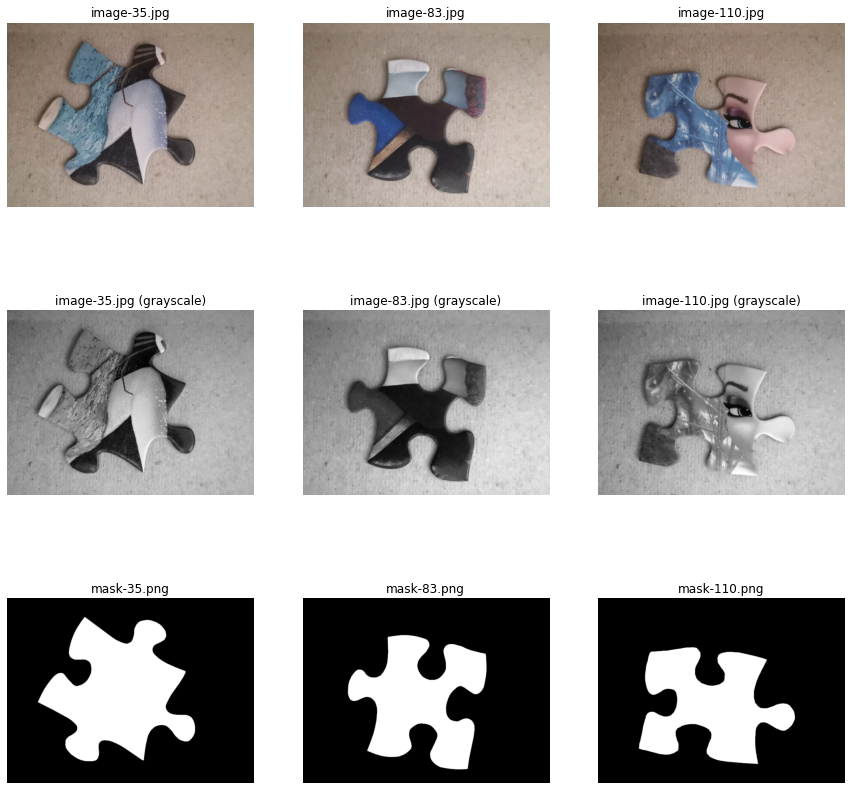

In [4]:
fig = plt.figure(figsize=(num_images * 5, 15))


def display_image(image, mask, i: int):
    image_name = os.path.basename(image.filename)
    mask_name = os.path.basename(mask.filename)

    fig.add_subplot(3, num_images, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_name)

    fig.add_subplot(3, num_images, num_images+i+1)
    grayscale = skimage.color.rgb2gray(image)
    plt.imshow(grayscale, cmap="gray")
    plt.axis('off')
    plt.title(image_name+" (grayscale)")

    fig.add_subplot(3, len(masks), 2*num_images+i+1)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_name)


perform_function_on_defaults(display_image)


### Section 4 - Descriptive Statistics


#### Questions 1, 2 & 3


In [5]:
def print_dimensions(image):
    name = os.path.basename(image.filename)
    print(name)

    print(f"1. {image.width} (width)")
    print(f"2. {image.height} (height)")
    print(f"3. {image.width * image.height} pixels")

    print()


perform_function_on_defaults(print_dimensions)


image-35.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-83.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-110.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels



#### Questions 4 & 5


In [6]:
def print_pixel_counts(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    mask_arr = np.asarray(mask.convert(mode="1"))
    unique, counts = np.unique(mask_arr, return_counts=True)

    counts_dict = dict(zip(unique, counts))

    print(f"4. {counts_dict[False]} black pixels")
    print(f"5. {counts_dict[True]} white pixels")

    print()


perform_function_on_defaults(print_pixel_counts)


image-35.jpg
4. 195470 black pixels
5. 74530 white pixels

image-83.jpg
4. 209682 black pixels
5. 60318 white pixels

image-110.jpg
4. 209196 black pixels
5. 60804 white pixels



#### Question 6 & 7


In [7]:
def print_min_max(image):
    name = os.path.basename(image.filename)
    print(name)

    grayscale = skimage.color.rgb2gray(image)

    print(f"6. {np.amin(grayscale)} (min)")
    print(f"7. {np.amax(grayscale)} (max)")

    print()


perform_function_on_defaults(print_min_max)


image-35.jpg
6. 0.08399686274509804 (min)
7. 0.8985443137254902 (max)

image-83.jpg
6. 0.10333686274509803 (min)
7. 0.8971980392156863 (max)

image-110.jpg
6. 0.05205882352941176 (min)
7. 0.8501392156862745 (max)



#### Question 8 & 9


In [8]:
def print_min_max_puzzle_bg(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    mask_arr = np.asarray(mask.convert(mode="1"))

    image_puzzle = image_arr[mask_arr == True]
    print(
        f"8. {np.amin(image_puzzle)} (min) and {np.amax(image_puzzle)} (max) - puzzle")

    image_bg = image_arr[mask_arr == False]
    print(f"9. {np.amin(image_bg)} (min) and {np.amax(image_bg)} (max) - background")

    print()


perform_function_on_defaults(print_min_max_puzzle_bg)


image-35.jpg
8. 0.08399686274509804 (min) and 0.8985443137254902 (max) - puzzle
9. 0.14756823529411764 (min) and 0.7937560784313724 (max) - background

image-83.jpg
8. 0.10333686274509803 (min) and 0.8971980392156863 (max) - puzzle
9. 0.18647843137254905 (min) and 0.8673949019607844 (max) - background

image-110.jpg
8. 0.05205882352941176 (min) and 0.8501392156862745 (max) - puzzle
9. 0.11280980392156864 (min) and 0.7903247058823529 (max) - background



#### Question 10


In [9]:
def mean_intensity(image):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    print(f"10. {np.mean(image_arr)} (mean)")

    print()


perform_function_on_defaults(mean_intensity)


image-35.jpg
10. 0.5384709828395062 (mean)

image-83.jpg
10. 0.5664833728249818 (mean)

image-110.jpg
10. 0.5367658629745824 (mean)



#### Question 11, 12, 13 & 14


In [10]:
def mean_intensity_puzzle_bg(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    mask_arr = np.asarray(mask.convert(mode="1"))

    image_puzzle = image_arr[mask_arr == True]
    image_bg = image_arr[mask_arr == False]

    print(f"11. {np.mean(image_puzzle)} (mean) - puzzle")
    print(f"12. {np.mean(image_bg)} (mean) - background")
    print(f"13. {np.var(image_puzzle)} (variance) - puzzle")
    print(f"14. {np.var(image_bg)} (variance) - background")

    print()


perform_function_on_defaults(mean_intensity_puzzle_bg)


image-35.jpg
11. 0.44184835546154594 (mean) - puzzle
12. 0.5753118505863695 (mean) - background
13. 0.03806606384291545 (variance) - puzzle
14. 0.00784590844729906 (variance) - background

image-83.jpg
11. 0.3251410136342743 (mean) - puzzle
12. 0.635908924000882 (mean) - background
13. 0.02979163158696951 (variance) - puzzle
14. 0.010540964523995569 (variance) - background

image-110.jpg
11. 0.462364174467366 (mean) - puzzle
12. 0.5583911343372892 (mean) - background
13. 0.027336018392854017 (variance) - puzzle
14. 0.008967652488759194 (variance) - background



#### Question 15, 16 & 17


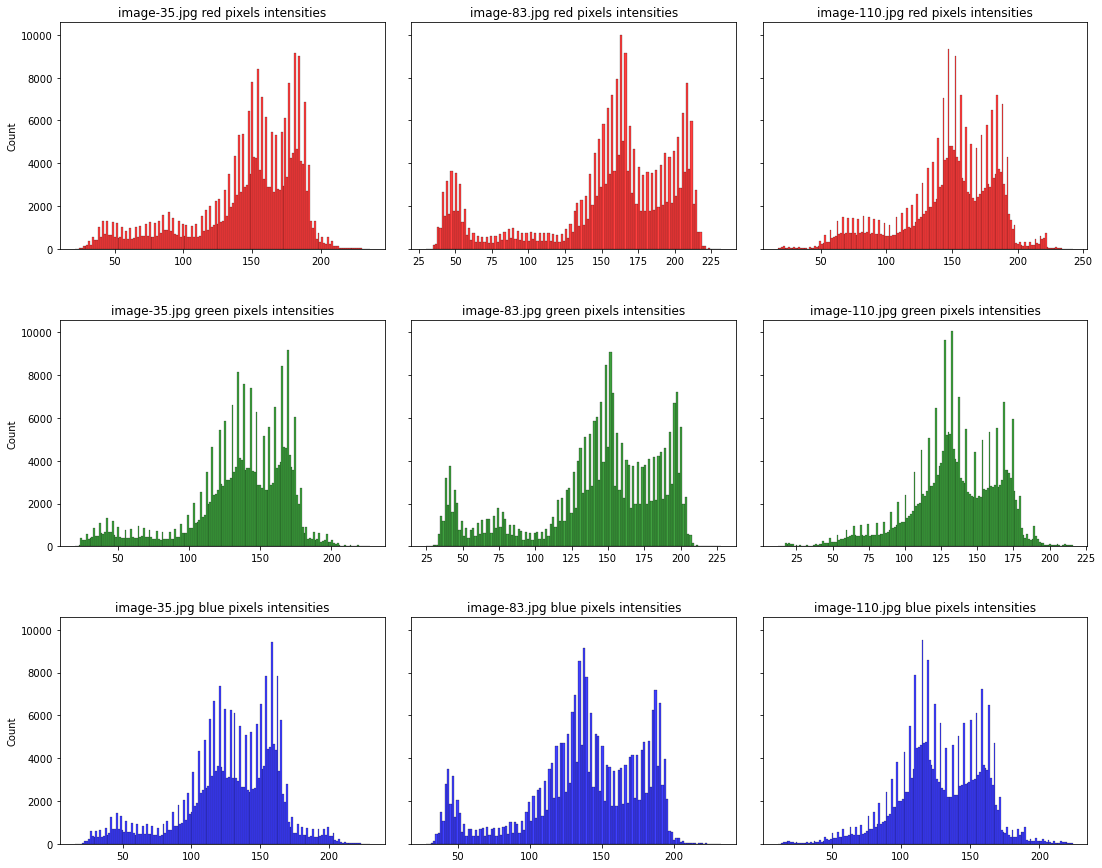

In [11]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_channel_histograms(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    red_pixels = image_arr[:, :, 0].flatten()
    sns.histplot(
        ax=axes[0, i],
        data=red_pixels,
        color="r"
    ).set(
        title=f"{name} red pixels intensities"
    )

    green_pixels = image_arr[:, :, 1].flatten()
    sns.histplot(
        ax=axes[1, i],
        data=green_pixels,
        color="g"
    ).set(
        title=f"{name} green pixels intensities"
    )

    blue_pixels = image_arr[:, :, 2].flatten()
    sns.histplot(
        ax=axes[2, i],
        data=blue_pixels,
        color="b"
    ).set(
        title=f"{name} blue pixels intensities"
    )


perform_function_on_defaults(display_channel_histograms)


#### Question 18


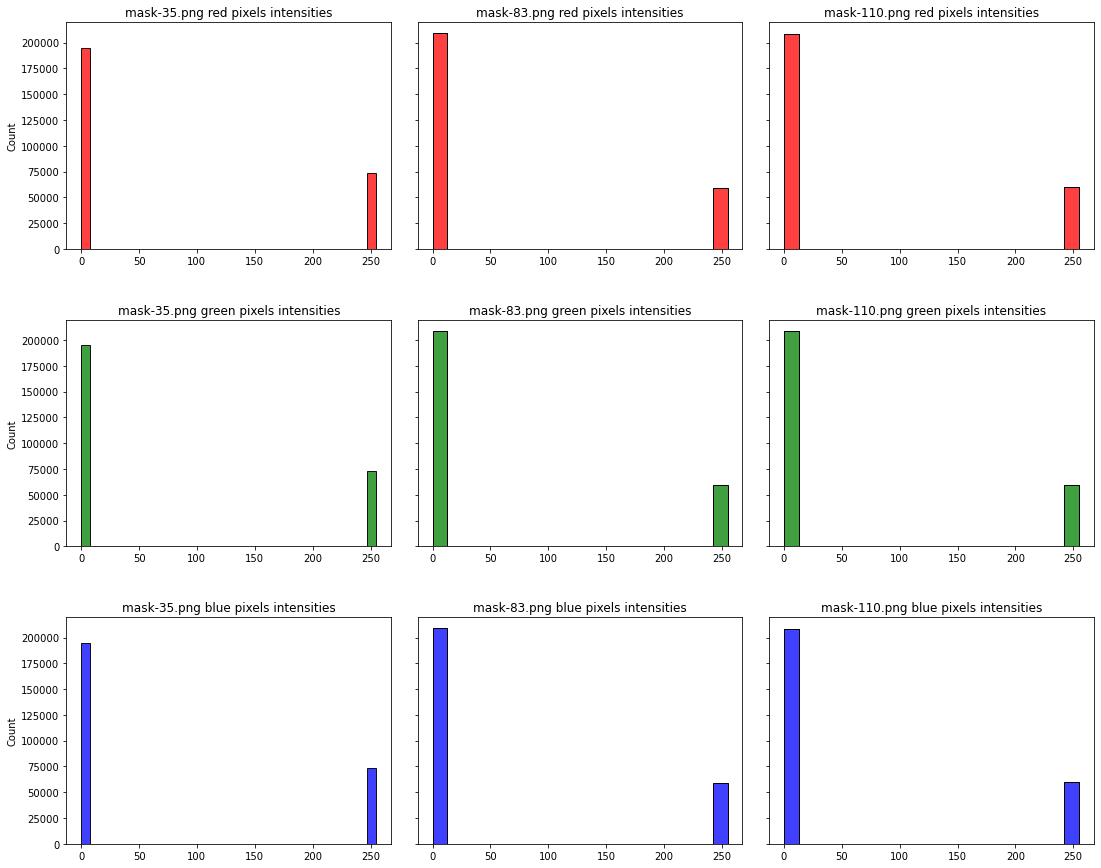

In [12]:
fig, axes = plt.subplots(3, num_masks, sharey=True)

fig.set_figwidth(5 * num_masks)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_mask_channel_histograms(_image, mask, i):
    name = os.path.basename(mask.filename)
    mask_arr = np.asarray(mask)

    red_pixels = mask_arr[:, :, 0].flatten()
    sns.histplot(
        ax=axes[0, i],
        data=red_pixels,
        color="r"
    ).set(
        title=f"{name} red pixels intensities"
    )

    green_pixels = mask_arr[:, :, 1].flatten()
    sns.histplot(
        ax=axes[1, i],
        data=green_pixels,
        color="g"
    ).set(
        title=f"{name} green pixels intensities"
    )

    blue_pixels = mask_arr[:, :, 2].flatten()
    sns.histplot(
        ax=axes[2, i],
        data=blue_pixels,
        color="b"
    ).set(
        title=f"{name} blue pixels intensities"
    )


perform_function_on_defaults(display_mask_channel_histograms)


#### Question 19, 20 & 21


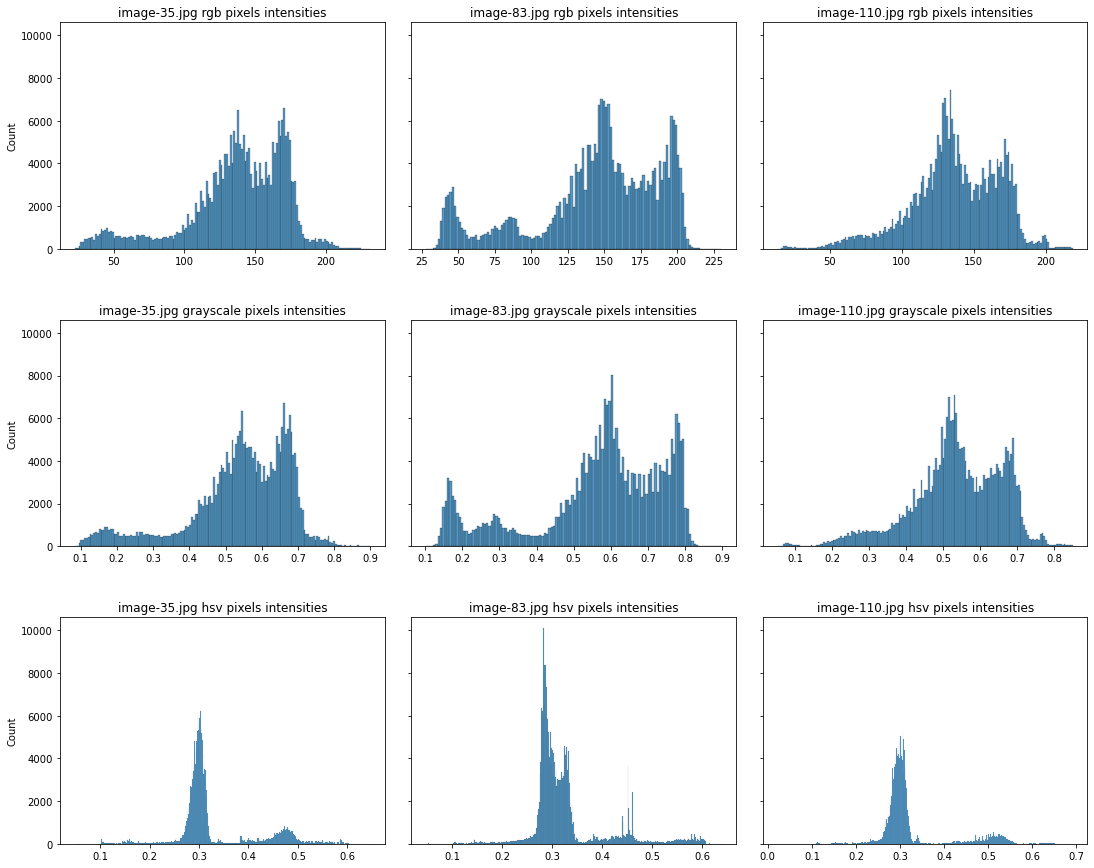

In [13]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_pixel_intensity_histograms(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    image_intensities = np.mean(image_arr, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities
    ).set(
        title=f"{name} rgb pixels intensities"
    )

    grayscale = skimage.color.rgb2gray(image_arr)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr
    ).set(
        title=f"{name} grayscale pixels intensities"
    )

    hsv = skimage.color.rgb2hsv(image_arr)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr
    ).set(
        title=f"{name} hsv pixels intensities"
    )


perform_function_on_defaults(display_pixel_intensity_histograms)


#### Question 22


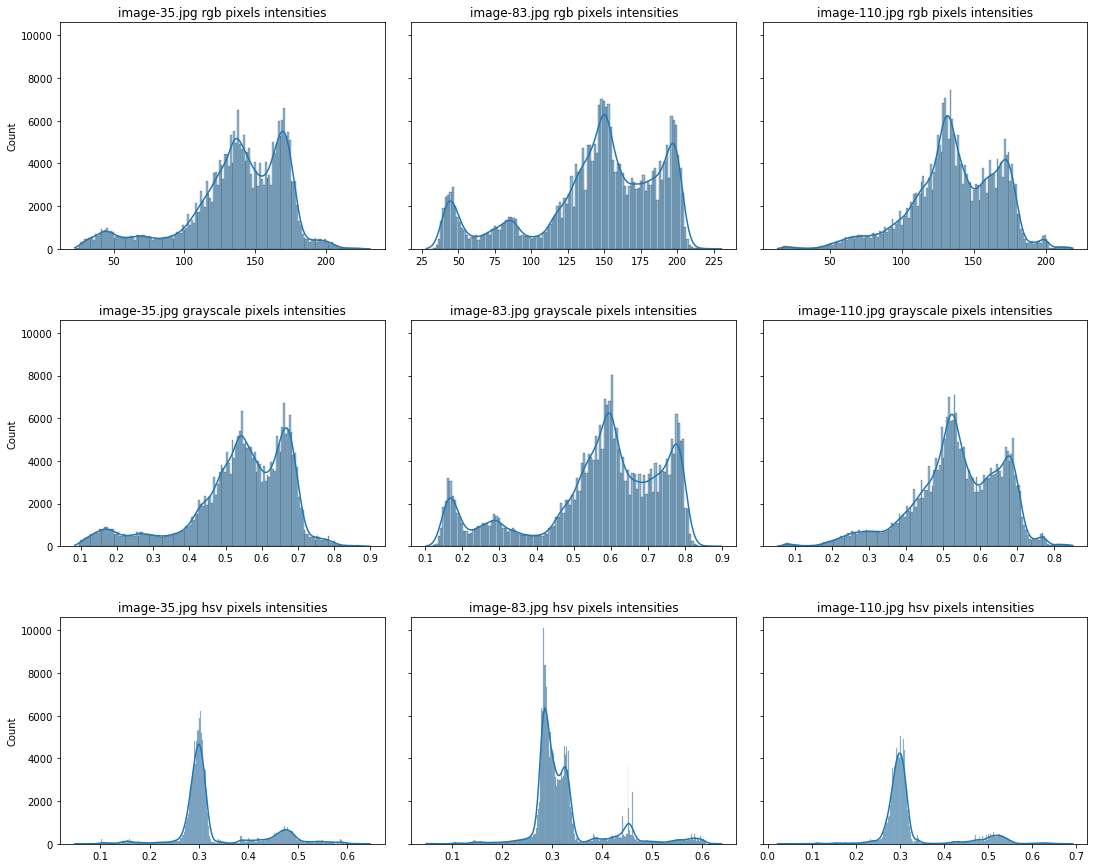

In [14]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_pixel_intensity_histograms_with_kernel_density_estimations(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    image_intensities = np.mean(image_arr, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities,
        kde=True
    ).set(
        title=f"{name} rgb pixels intensities"
    )

    grayscale = skimage.color.rgb2gray(image_arr)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr,
        kde=True
    ).set(
        title=f"{name} grayscale pixels intensities"
    )

    hsv = skimage.color.rgb2hsv(image_arr)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr,
        kde=True
    ).set(
        title=f"{name} hsv pixels intensities"
    )


perform_function_on_defaults(display_pixel_intensity_histograms_with_kernel_density_estimations)

### Section 5 - Bonus


#### Question 1


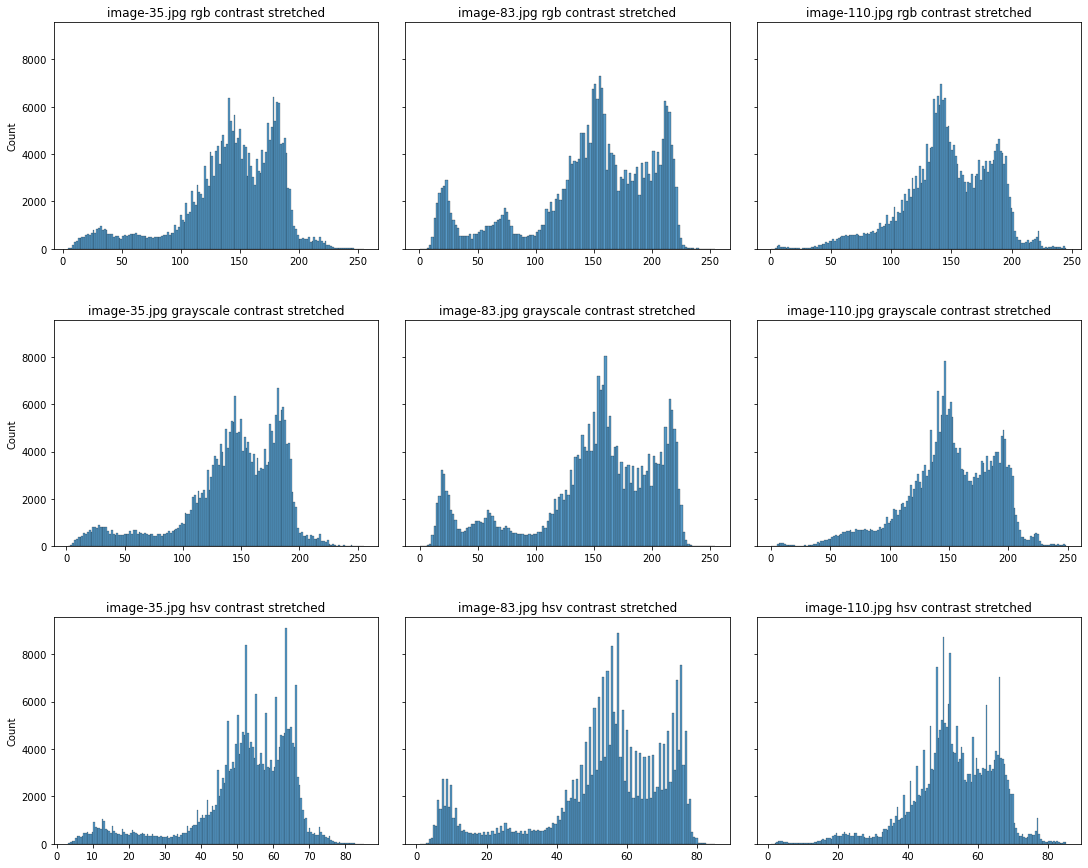

In [15]:
def channel_contrast_stretch(channel):
    channel_min, channel_max = np.amin(channel), np.amax(channel)
    return (channel - channel_min) / (channel_max - channel_min)

fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

def contrast_stretch(image, _mask, i):
    name = os.path.basename(image.filename)

    image_arr = np.asarray(image) / 255
    
    image_stretched = np.zeros(image_arr.shape)
    
    image_stretched[:, :, 0] = channel_contrast_stretch(image_arr[:, :, 0])
    image_stretched[:, :, 1] = channel_contrast_stretch(image_arr[:, :, 1])
    image_stretched[:, :, 2] = channel_contrast_stretch(image_arr[:, :, 2])
    
    image_stretched = image_stretched * 255
    
    image_intensities = np.mean(image_stretched, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities
    ).set(
        title=f"{name} rgb contrast stretched"
    )

    grayscale = skimage.color.rgb2gray(image_stretched)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr
    ).set(
        title=f"{name} grayscale contrast stretched"
    )

    hsv = skimage.color.rgb2hsv(image_stretched)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr
    ).set(
        title=f"{name} hsv contrast stretched"
    )

perform_function_on_defaults(contrast_stretch)


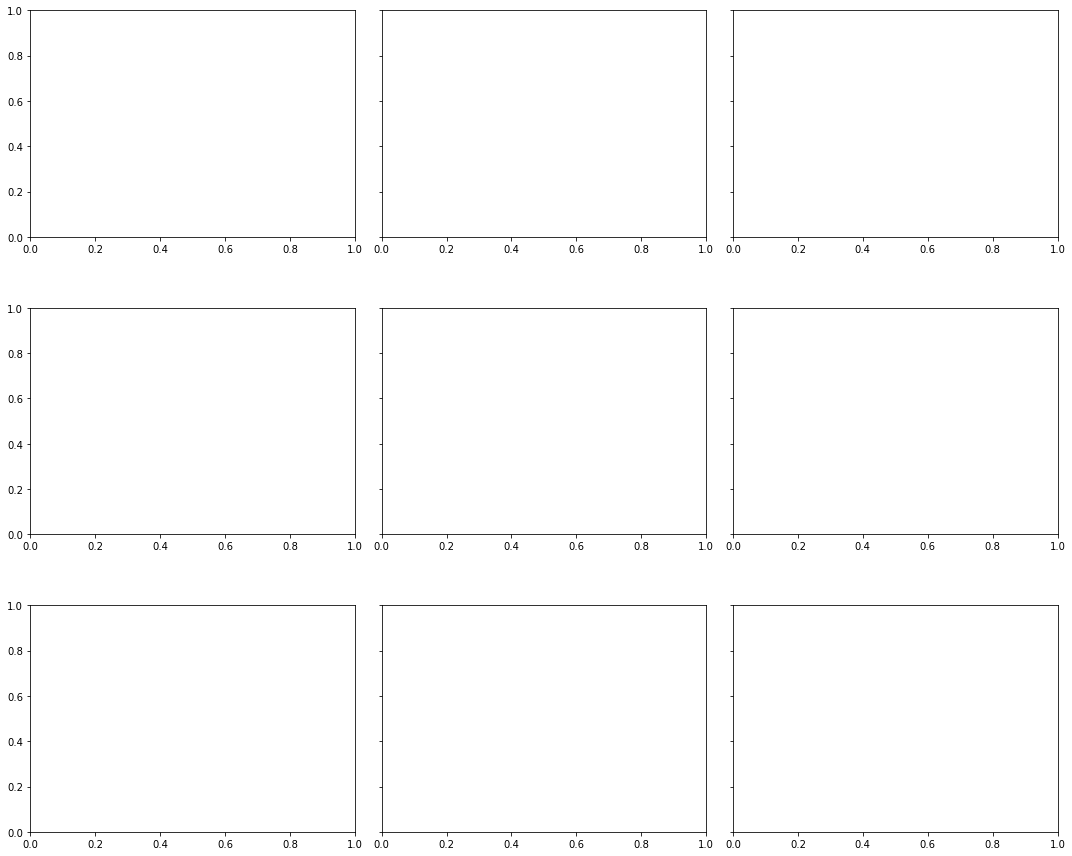

In [16]:
def channel_equalization(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    normalized = cdf * hist.max() / cdf.max()
    return normalized

fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

def histogram_equalization(image, _mask, i):
    name = os.path.basename(image.filename)

    image_arr = np.asarray(image)
    
    equalized_red = channel_equalization(image_arr[:, :, 0])
    equalized_green = channel_equalization(image_arr[:, :, 1])
    equalized_blue = channel_equalization(image_arr[:, :, 2])
    

perform_function_on_defaults(histogram_equalization)

### Section 6


#### Question 1


In [17]:
def apply_convolution(image_arr: NDArray, kernel: NDArray, pad_type: Literal["zeros", "repeated", None] = None):
    """Apply a convolution to an image based on given kernel and padding type

    Args:
        image_arr (NDArray): N X M Image
        kernel (NDArray): _description_
        pad_type (Literal[&quot;zeros&quot;, &quot;repeated&quot;, None], optional): _description_. Defaults to None.

    Raises:
        Exception: _description_
        Exception: _description_

    Returns:
        _type_: _description_
    """
    image_x, image_y = image_arr.shape[0], image_arr.shape[1]
    image_pixels = 1 if len(image_arr.shape) == 2 else image_arr.shape[2]

    kernel_x, kernel_y = kernel.shape[0], kernel.shape[1]

    kernel_center_x = (kernel_x - 1) // 2
    kernel_center_y = (kernel_y - 1) // 2

    def get_image_slice_around(x: int, y: int):
        """Get image slice around x and y based on kernel

        Args:
            x (int): x-coordinate of pixel
            y (int): y-coordinate of pixel

        Raises:
            Exception: x and y are out of bounds and no padding method is provided

        Returns:
            NDArray: Image slice with appropriate padding for out of bounds pixels
        """

        start_x, start_y = x - kernel_center_x, y - kernel_center_y
        end_x, end_y = x + kernel_center_x, y + kernel_center_y

        image_slice = []
        for y in range(start_y, end_y+1):
            slice_row = []
            for x in range(start_x, end_x+1):
                if y >= 0 and y < image_y and x >= 0 and x < image_x:
                    slice_row.append(image_arr[x, y])
                    continue

                if pad_type == "zeros":
                    slice_row.append(0 if image_pixels ==
                                     1 else [0] * image_pixels)
                    continue

                if pad_type == "repeated":
                    inbound_y = min(max(y, 0), image_y - 1)
                    inbound_x = min(max(x, 0), image_x - 1)
                    slice_row.append(image_arr[inbound_y,  inbound_x])
                    continue

                raise Exception(
                    f"y={y} and/or x={x} out of bounds for {image_x} x {image_y} and padding type not provided")

            image_slice.append(slice_row)
        return np.asarray(image_slice)

    if pad_type == None:
        start_x = kernel_center_x
        start_y = kernel_center_y
        end_x = image_x - kernel_center_x
        end_y = image_y - kernel_center_y

        if end_x <= start_x or end_y <= start_y:
            raise Exception(
                f"kernel size larger than image size... consider providing padding type")

    else:
        start_x = 0
        start_y = 0
        end_x = image_x
        end_y = image_y

    new_image = np.zeros((end_x-start_x, end_y-start_y))

    for y in range(start_y, end_y-1):
        for x in range(start_x, end_x-1):
            new_image[x-start_x, y -
                      start_y] = np.sum((get_image_slice_around(x, y) * np.rot90(np.rot90(kernel))).flatten())

    return new_image


#### Question 2


In [18]:
def get_image_features(image_name):
    features = []

    with PIL.Image.open(f"./assets/{image_name}") as image:
        # RGB
        rgb_image = image.convert(mode="RGB")
        image_arr = np.asarray(rgb_image)
        image_red = image_arr[:, :, 0] / 255
        image_green = image_arr[:, :, 1] / 255
        image_blue = image_arr[:, :, 2] / 255
        features.extend([image_red, image_green, image_blue])

        # HSV
        image_hsv = skimage.color.rgb2hsv(image_arr)
        image_hue = image_hsv[:, :, 0]
        image_saturation = image_hsv[:, :, 1]
        image_value = image_hsv[:, :, 2]
        features.extend([image_hue, image_saturation, image_value])

        # Prewitt Vertical
        prewitt_vertical_image_red = apply_convolution(
            image_red,
            prewitt_vertical,
            pad_type="zeros"
        )
        prewitt_vertical_image_green = apply_convolution(
            image_green,
            prewitt_vertical,
            pad_type="zeros"
        )
        prewitt_vertical_image_blue = apply_convolution(
            image_blue,
            prewitt_vertical,
            pad_type="zeros"
        )
        features.extend([prewitt_vertical_image_red, prewitt_vertical_image_green, prewitt_vertical_image_blue])

        # Prewitt Vertical
        prewitt_horizontal_image_red = apply_convolution(
            image_red,
            prewitt_horizontal,
            pad_type="zeros"
        )
        prewitt_horizontal_image_green = apply_convolution(
            image_green,
            prewitt_horizontal,
            pad_type="zeros"
        )
        prewitt_horizontal_image_blue = apply_convolution(
            image_blue,
            prewitt_horizontal,
            pad_type="zeros"
        )
        features.extend([prewitt_horizontal_image_red, prewitt_horizontal_image_green, prewitt_horizontal_image_blue])

        # Laplacian
        laplacian_image_red = apply_convolution(
            image_red,
            laplacian,
            pad_type="zeros"
        )
        laplacian_image_green = apply_convolution(
            image_green,
            laplacian,
            pad_type="zeros"
        )
        laplacian_image_blue = apply_convolution(
            image_blue,
            laplacian,
            pad_type="zeros"
        )
        features.extend([laplacian_image_red, laplacian_image_green, laplacian_image_blue])
        
    return np.asarray(features)

In [19]:
training_features = get_image_features(image_35)

#### Question 3

In [20]:
features_mean = np.mean(training_features, axis=(1,2))
print("mean", features_mean.shape)

features_cov = np.cov(training_features.reshape(15, 270000))
print("cov", features_cov.shape)

mean (15,)
cov (15, 15)


#### Question 4

In [21]:
validation_features = get_image_features(image_83)

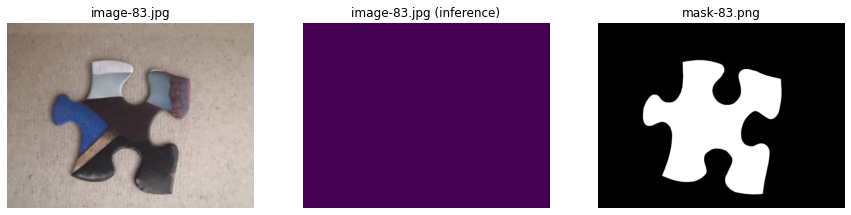

In [22]:
normal_dist = scipy.stats.multivariate_normal(mean=features_mean, cov=features_cov)
normal_pdf = normal_dist.pdf(validation_features.reshape(450, 600, 15))

fig = plt.figure(figsize=(num_images * 5, 15))

with PIL.Image.open(f"./assets/{image_83}") as image:
    fig.add_subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_83)

fig.add_subplot(1, 3, 2)
plt.imshow(normal_pdf)
plt.axis('off')
plt.title(f"{image_83} (inference)")

with PIL.Image.open(f"./assets/{mask_83}") as mask:
    fig.add_subplot(1, 3, 3)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_83)

#### Question 5

In [25]:
def get_image_features_with_hsv(image_name):
    features = get_image_features(image_name).tolist()

    with PIL.Image.open(f"./assets/{image_name}") as image:
        # RGB
        rgb_image = image.convert(mode="RGB")
        image_arr = np.asarray(rgb_image)

        # HSV
        image_hsv = skimage.color.rgb2hsv(image_arr)
        image_hue = image_hsv[:, :, 0]
        image_saturation = image_hsv[:, :, 1]
        image_value = image_hsv[:, :, 2]

        # Prewitt Vertical
        prewitt_vertical_image_hue = apply_convolution(
            image_hue,
            prewitt_vertical,
            pad_type="zeros"
        )
        prewitt_vertical_image_saturation = apply_convolution(
            image_saturation,
            prewitt_vertical,
            pad_type="zeros"
        )
        prewitt_vertical_image_value = apply_convolution(
            image_value,
            prewitt_vertical,
            pad_type="zeros"
        )
        features.extend([prewitt_vertical_image_hue, prewitt_vertical_image_saturation, prewitt_vertical_image_value])

        # Prewitt Horizontal
        prewitt_horizontal_image_hue = apply_convolution(
            image_hue,
            prewitt_horizontal,
            pad_type="zeros"
        )
        prewitt_horizontal_image_saturation = apply_convolution(
            image_saturation,
            prewitt_horizontal,
            pad_type="zeros"
        )
        prewitt_horizontal_image_value = apply_convolution(
            image_value,
            prewitt_horizontal,
            pad_type="zeros"
        )
        features.extend([prewitt_horizontal_image_hue, prewitt_horizontal_image_saturation, prewitt_horizontal_image_value])
    
        # Laplacian
        laplacian_image_hue = apply_convolution(
            image_hue,
            laplacian,
            pad_type="zeros"
        )
        laplacian_image_saturation = apply_convolution(
            image_saturation,
            laplacian,
            pad_type="zeros"
        )
        laplacian_image_value = apply_convolution(
            image_value,
            laplacian,
            pad_type="zeros"
        )
        features.extend([laplacian_image_hue, laplacian_image_saturation, laplacian_image_value])
        
    return np.asarray(features)

In [26]:
training_features_with_hsv = get_image_features_with_hsv(image_35)

In [27]:
inference_features_with_hsv = get_image_features_with_hsv(image_83)

In [ ]:
features_with_hsv_mean = np.mean(training_features_with_hsv, axis=(1,2))
print("mean", features_with_hsv_mean.shape)

features_with_hsv_cov = np.cov(training_features_with_hsv.reshape(24, 270000))
print("cov", features_with_hsv_cov.shape)

In [ ]:
normal_dist_with_hsv = scipy.stats.multivariate_normal(mean=features_with_hsv_mean, cov=features_with_hsv_cov)
normal_pdf_with_hsv = normal_dist_with_hsv.pdf(inference_features_with_hsv.reshape(450, 600, 24))

fig = plt.figure(figsize=(num_images * 5, 15))

with PIL.Image.open(f"./assets/{image_83}") as image:
    fig.add_subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_83)

fig.add_subplot(1, 3, 2)
plt.imshow(normal_pdf_with_hsv)
plt.axis('off')
plt.title(f"{image_83} (inference with hsv features)")

with PIL.Image.open(f"./assets/{mask_83}") as mask:
    fig.add_subplot(1, 3, 3)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_83)

print(scipy.stats.mvn.mvnun(-np.inf, 1, normal_pdf_with_hsv))

#### Question 6

#### Question 7